### 1. Importing initial required libraries

In [429]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Importing dataset

In [430]:
data = pd.read_csv('Leads.csv')
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [431]:
data.shape

(9240, 37)

In [432]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### 3. Data Cleaning

In [433]:
# checking for null values
def check_null(dataset):
    perc = round(100*(data.isnull().sum()/len(data.index)), 2)
    return perc

In [434]:
check_null(data)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [435]:
#columns Prospect ID and Lead Number has no contribution towards the data and are only indicative

data.drop(['Prospect ID', 'Lead Number'], axis = 1, inplace=True)

In [436]:
# as given in dictionary, the Select are equal to null values

data = data.replace('Select', np.NaN)

In [437]:
check_null(data)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [438]:
# columns with missing values more than 45% need to be dropped

cols = ['Lead Profile','How did you hear about X Education','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score']

data.drop(cols, axis=1, inplace=True)

In [439]:
data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Checking for missing values in columns

In [440]:
# lead quality
data['Lead Quality'].value_counts(dropna=False)

Lead Quality
NaN                  4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

In [441]:
data['Lead Quality'] = data['Lead Quality'].replace([np.NaN,'Might be','Not Sure'],'Others')

In [442]:
data['Lead Quality'].value_counts()

Lead Quality
Others               7419
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

In [443]:
#country, city are not relevent in finding the lead score so better to remove them
data.drop(['Country', 'City'], axis=1, inplace=True)

In [444]:
# Specialization
data['Specialization'].value_counts(dropna=False)

Specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [445]:
data['Specialization'] = data['Specialization'].replace(np.NaN, 'Not Specified')

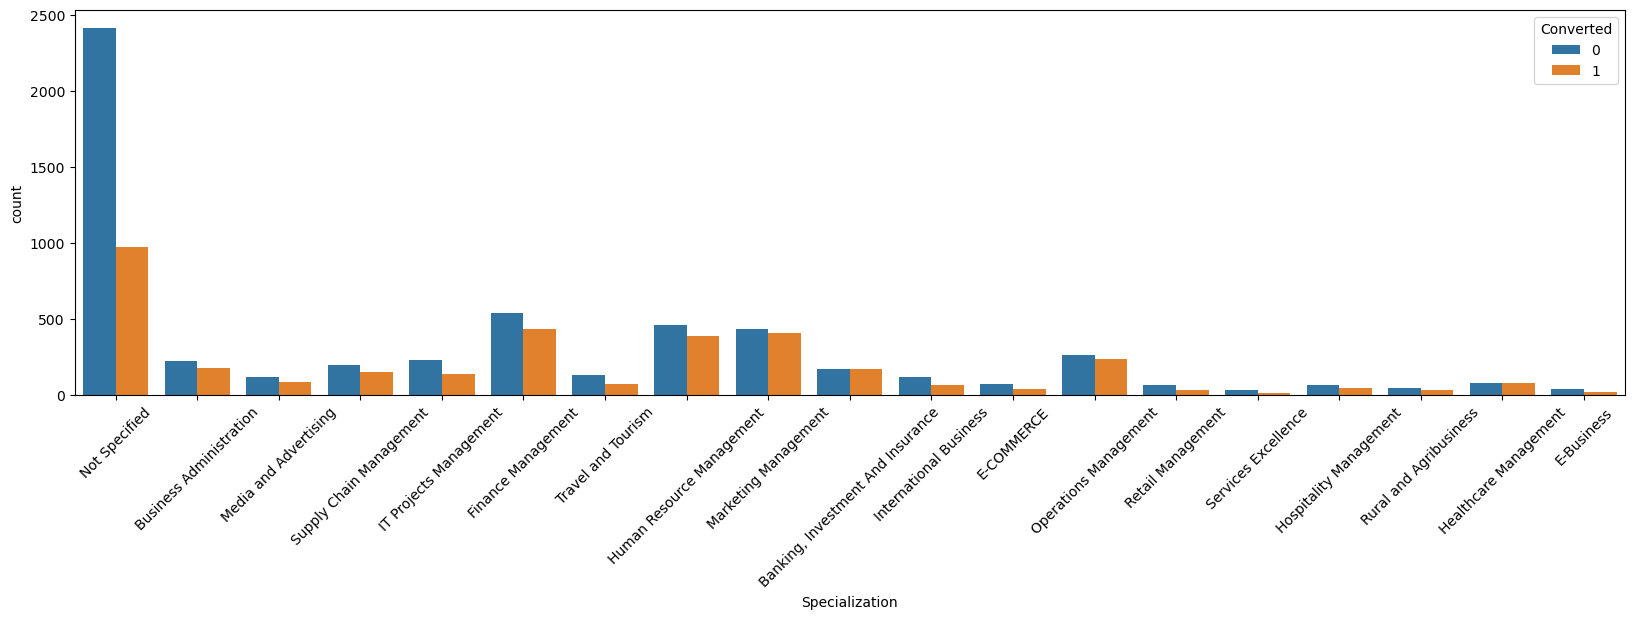

In [446]:
plt.figure(figsize=[20,5])
s_plot = sns.countplot(x=data['Specialization'], hue=data['Converted'])
s_plot.set_xticklabels(s_plot.get_xticklabels(),rotation=45)
plt.show()

In [447]:
# alot of values in Specialization column has management in it, we can merge them into one as 'Management'
data['Specialization'] = data['Specialization'].replace(
    ['Finance Management', 'Human Resource Management', 'Marketing Management', 'Operations Management ',
     'IT Projects Management', 'Supply Chain Management', 'Healthcare Management', 'Hospitality Management',
    'Retail Management'], 'Management')

In [448]:
# Specialization
data['Specialization'].value_counts(dropna=False)

Specialization
Management                           3750
Not Specified                        3380
Operations Management                 503
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

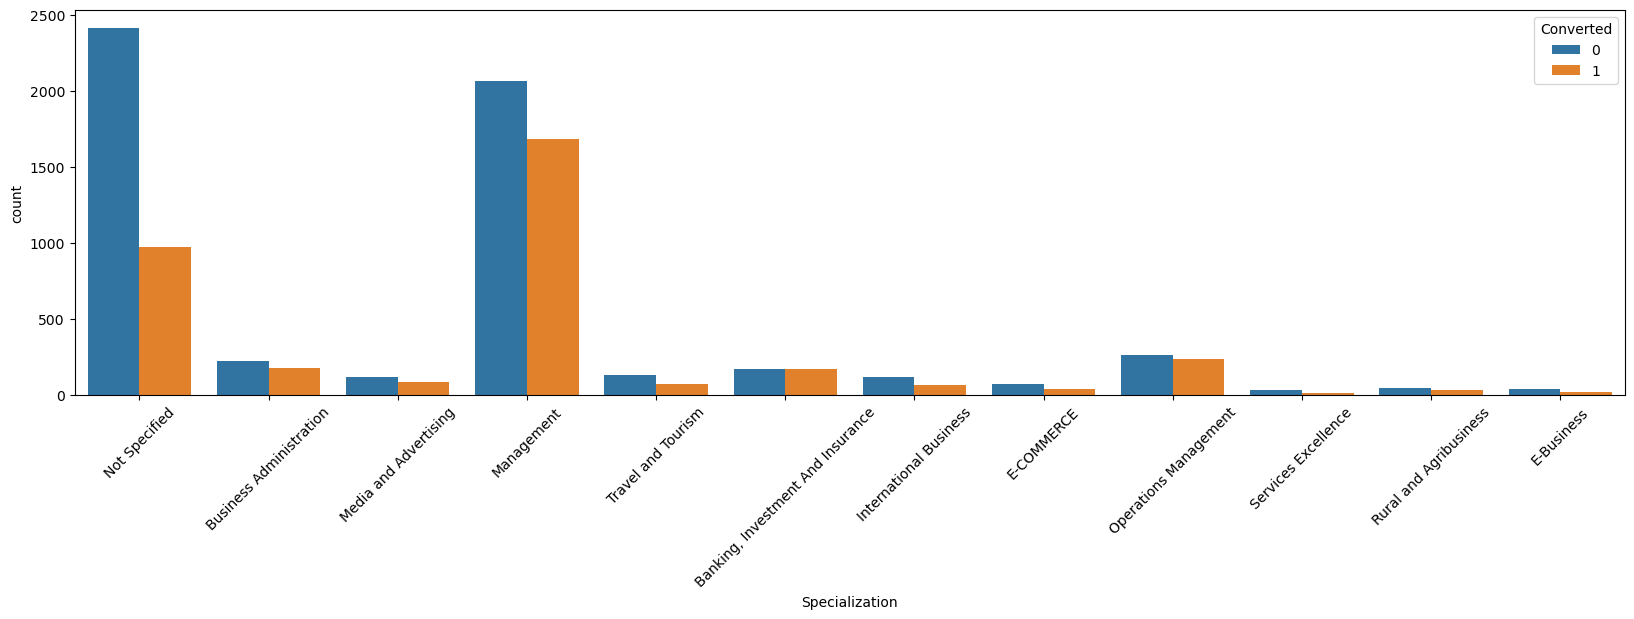

In [449]:
plt.figure(figsize=[20,5])
s_plot = sns.countplot(x=data['Specialization'], hue=data['Converted'])
s_plot.set_xticklabels(s_plot.get_xticklabels(),rotation=45)
plt.show()

In [450]:
#How did you hear about X Education
data['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [451]:
# impiting NaN with mode
data['What is your current occupation'] = data['What is your current occupation'].replace([np.NaN, 'Other'], 'Unemployed')

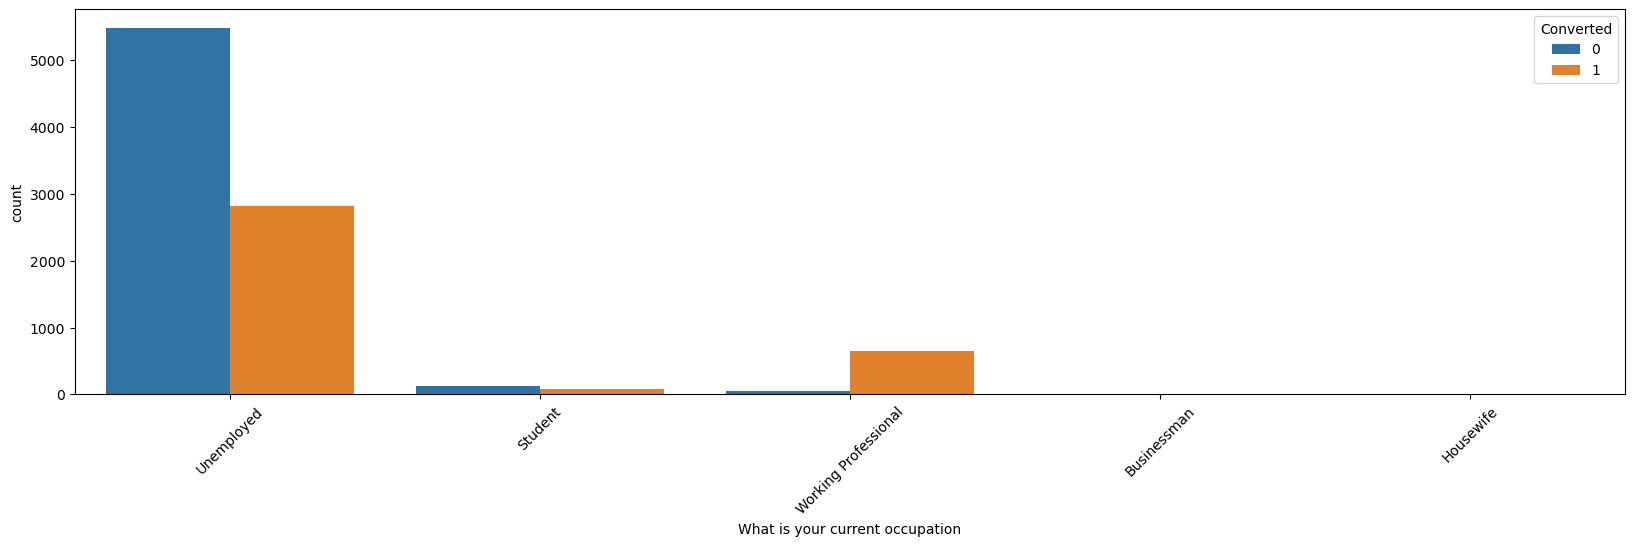

In [452]:
plt.figure(figsize=[20,5])
s_plot = sns.countplot(x=data['What is your current occupation'], hue=data['Converted'])
s_plot.set_xticklabels(s_plot.get_xticklabels(),rotation=45)
plt.show()

- Working Professional are more likely to convert as lead

In [453]:
#What matters most to you in choosing a course
data['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [454]:
#using mode to impute the null values
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].fillna('Better Career Prospects')

In [455]:
data['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [456]:
# beter to to drop this column
data.drop('What matters most to you in choosing a course', axis=1, inplace=True)

In [457]:
data['Tags'].value_counts(dropna=False)

Tags
NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

In [458]:
data['Tags'] = data['Tags'].replace(np.NaN, 'Not Specified')

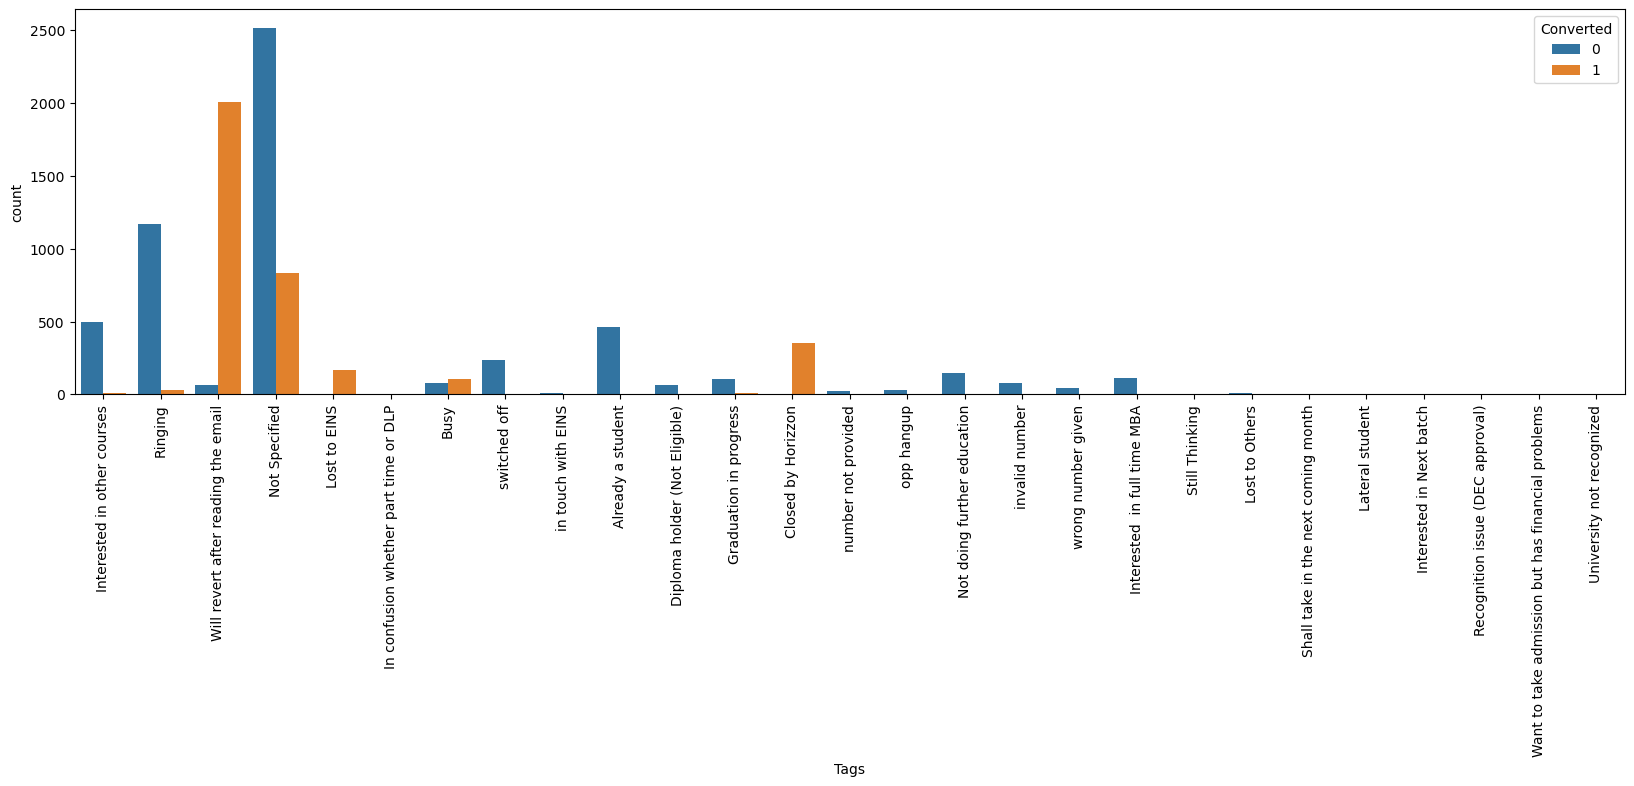

In [459]:
plt.figure(figsize=[20,5])
s_plot = sns.countplot(x=data['Tags'], hue=data['Converted'])
s_plot.set_xticklabels(s_plot.get_xticklabels(),rotation=90)
plt.show()

In [460]:
# replace values to others for those column which are not significant to the data and havent converted
data['Tags'] = data['Tags'].replace(['switched off','in touch with EINS','Already a student','Diploma holder (Not Eligible)',
                                   'Graduation in progress','number not provided','opp hangup','Not doing further education',
                                   'invalid number','wrong number given','Interested  in full time MBA','Still  Thinking',
                                   'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                   'University not recognized','Recognition issue (DEC approval)',
                                   'Want to take admission but has financial problems','Still Thinking','Interested in other courses',
                                    'In confusion whether part time or DLP'], 'Other') 

In [461]:
data['Tags'].value_counts(dropna=False)

Tags
Not Specified                          3353
Will revert after reading the email    2072
Other                                  1893
Ringing                                1203
Closed by Horizzon                      358
Busy                                    186
Lost to EINS                            175
Name: count, dtype: int64

In [462]:
check_null(data)

Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                                        0.00
Lead Quality        

In [463]:
#lead source
data['Lead Source'].value_counts(dropna=False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [464]:
data['Lead Source']=data['Lead Source'].replace('google', 'Google')
data['Lead Source']=data['Lead Source'].replace(np.NaN, 'Others')
data['Lead Source']=data['Lead Source'].replace('Facebook', 'Social Media')
data['Lead Source']=data['Lead Source'].replace(['bing','Click2call','Press_Release','Live Chat','Referral Sites',
                            'youtubechannel','testone','Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM']
                           , 'Others')

In [465]:
data['Lead Source'].value_counts(dropna=False)

Lead Source
Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Others               182
Welingak Website     142
Social Media          57
Name: count, dtype: int64

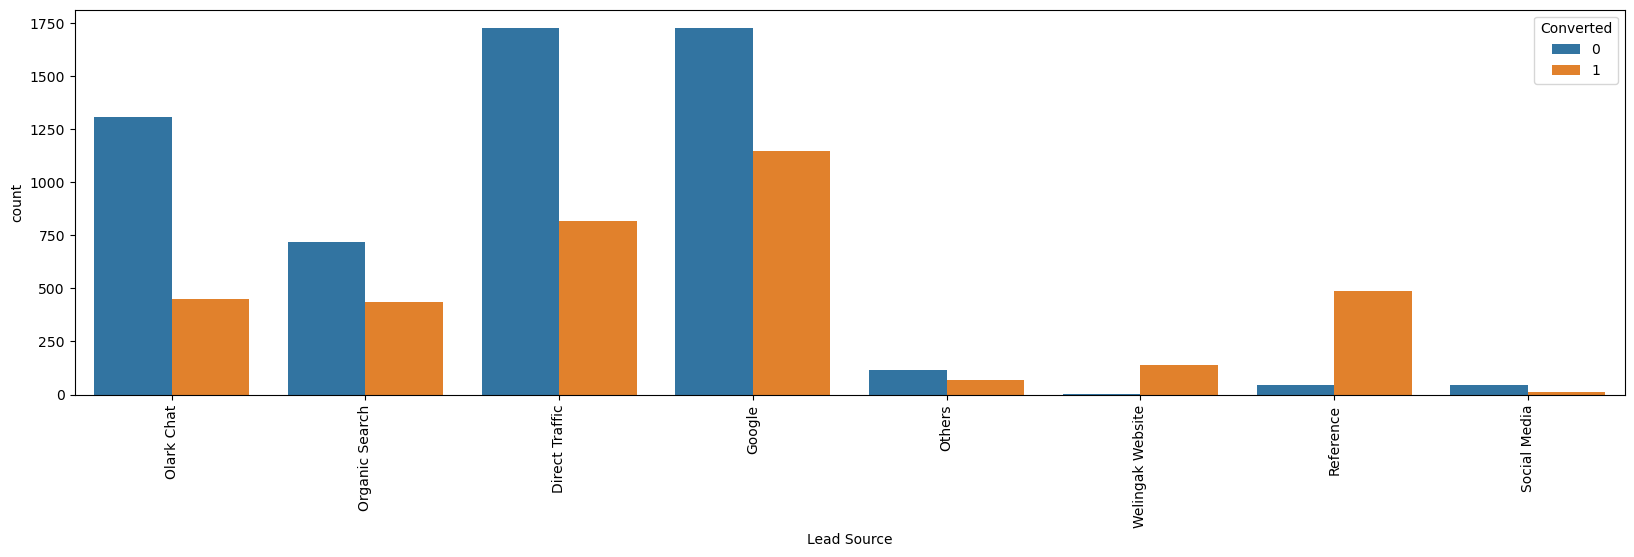

In [466]:
plt.figure(figsize=[20,5])
s_plot = sns.countplot(x=data['Lead Source'], hue=data['Converted'])
s_plot.set_xticklabels(s_plot.get_xticklabels(),rotation=90)
plt.show()

- Lead came from Reference as source have taken up the course most times

In [467]:
#Last activity
data['Last Activity'].value_counts(dropna= False)

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [468]:
data['Last Activity'] = data['Last Activity'].replace([np.NaN, 'Unreachable','Unsubscribed','Had a Phone Conversation',
                                                       'Approached upfront','View in browser link Clicked','Email Received',
                                                       'Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails',
                                                      'Email Bounced','Olark Chat Conversation'],
                                                     'Others')

In [469]:
data['Last Activity'].value_counts(dropna= False)

Last Activity
Email Opened                 3437
SMS Sent                     2745
Others                       1607
Page Visited on Website       640
Converted to Lead             428
Email Link Clicked            267
Form Submitted on Website     116
Name: count, dtype: int64

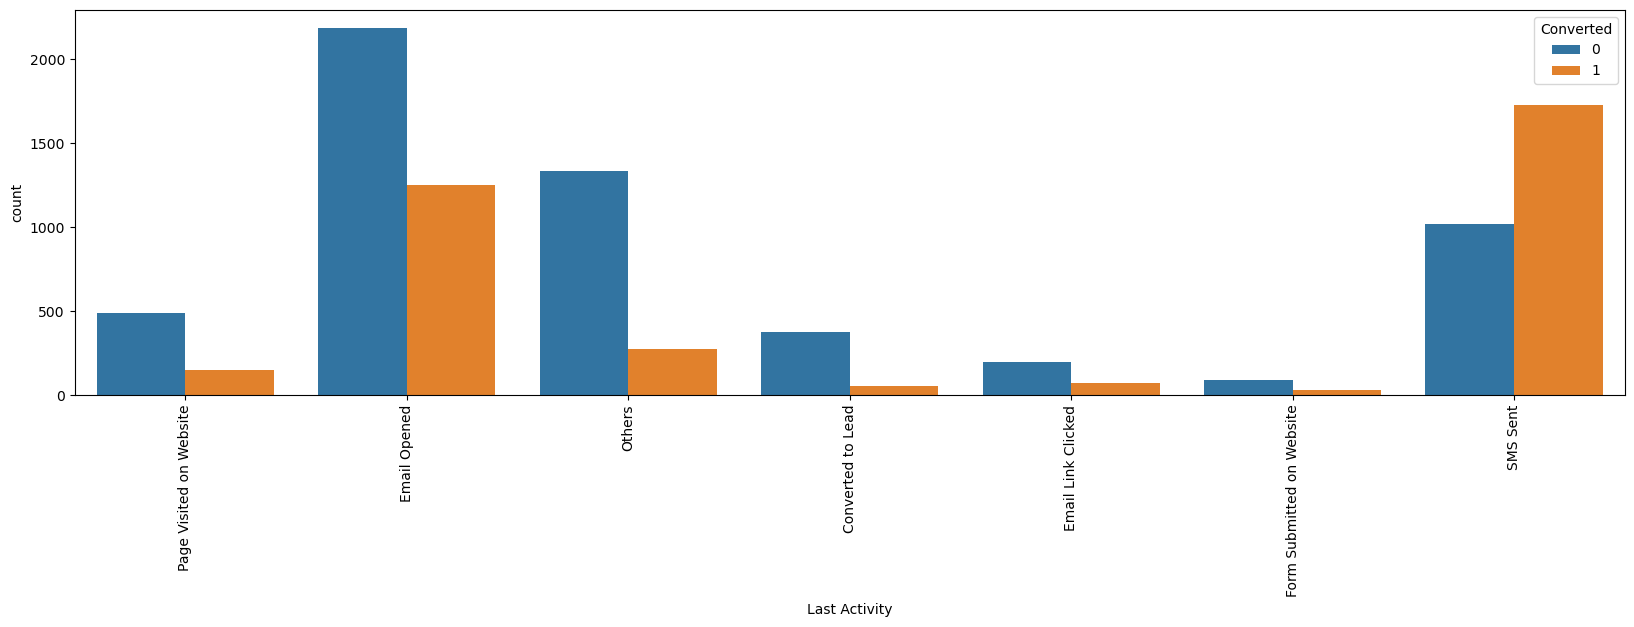

In [470]:
plt.figure(figsize=[20,5])
s_plot = sns.countplot(x=data['Last Activity'], hue=data['Converted'])
s_plot.set_xticklabels(s_plot.get_xticklabels(),rotation=90)
plt.show()

- Candidates who has recieved sms have mostly takeup the course

In [471]:
data = data[~data['TotalVisits'].isnull()]
data = data[~data['Page Views Per Visit'].isnull()]

In [472]:
check_null(data)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Lead Quality                            

In [473]:
# dont call
data['Do Not Call'].value_counts(dropna = False)

Do Not Call
No     9101
Yes       2
Name: count, dtype: int64

In [474]:
# dont email
data['Do Not Email'].value_counts(dropna = False)

Do Not Email
No     8379
Yes     724
Name: count, dtype: int64

In [475]:
#dont call column is very biased to NO hence can be dropped
data.drop('Do Not Call', inplace=True, axis=1)

In [476]:
data['Search'].value_counts(dropna=False)

Search
No     9089
Yes      14
Name: count, dtype: int64

In [477]:
data['Magazine'].value_counts(dropna=False)

Magazine
No    9103
Name: count, dtype: int64

In [478]:
data['Newspaper Article'].value_counts(dropna=False)

Newspaper Article
No     9101
Yes       2
Name: count, dtype: int64

In [479]:
data['X Education Forums'].value_counts(dropna=False)

X Education Forums
No     9102
Yes       1
Name: count, dtype: int64

In [480]:
data['Newspaper'].value_counts(dropna=False)

Newspaper
No     9102
Yes       1
Name: count, dtype: int64

In [481]:
data['Digital Advertisement'].value_counts(dropna=False)

Digital Advertisement
No     9099
Yes       4
Name: count, dtype: int64

In [482]:
data['Through Recommendations'].value_counts(dropna=False)

Through Recommendations
No     9096
Yes       7
Name: count, dtype: int64

In [483]:
data['Receive More Updates About Our Courses'].value_counts(dropna=False)

Receive More Updates About Our Courses
No    9103
Name: count, dtype: int64

In [484]:
data['Update me on Supply Chain Content'].value_counts(dropna=False)

Update me on Supply Chain Content
No    9103
Name: count, dtype: int64

In [485]:
data['I agree to pay the amount through cheque'].value_counts(dropna=False)

I agree to pay the amount through cheque
No    9103
Name: count, dtype: int64

In [486]:
data['A free copy of Mastering The Interview'].value_counts(dropna=False)

A free copy of Mastering The Interview
No     6215
Yes    2888
Name: count, dtype: int64

In [487]:
data['Get updates on DM Content'].value_counts(dropna=False)

Get updates on DM Content
No    9103
Name: count, dtype: int64

In [488]:
# All the above column need to be dropped as they are either biased or has only one value
data.drop(['Search','Magazine', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
          'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
          'I agree to pay the amount through cheque','Get updates on DM Content'],
          axis=1, inplace=True)

In [489]:
check_null(data)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
Lead Quality                              0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [490]:
data['Last Notable Activity'].value_counts(dropna=False)

Last Notable Activity
Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

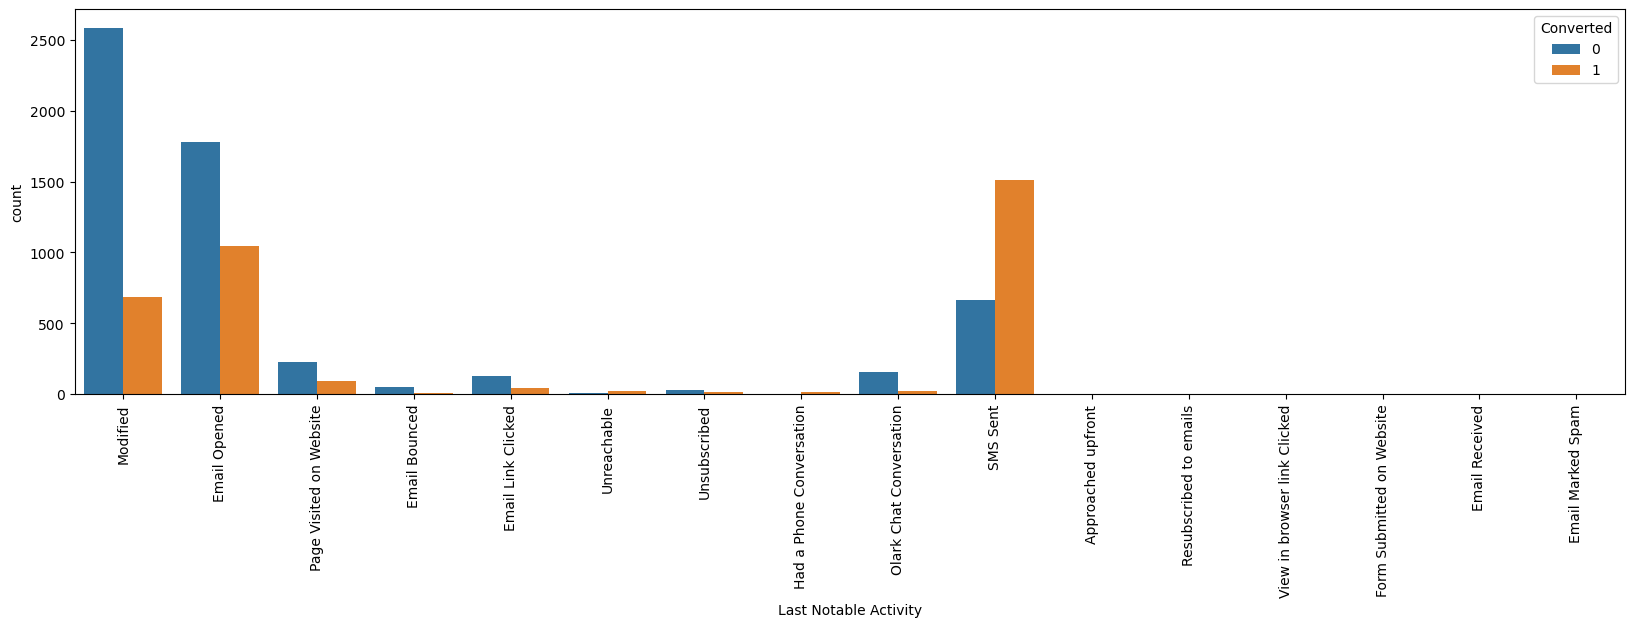

In [491]:
plt.figure(figsize=[20,5])
s_plot = sns.countplot(x=data['Last Notable Activity'], hue=data['Converted'])
s_plot.set_xticklabels(s_plot.get_xticklabels(),rotation=90)
plt.show()

In [492]:
data['Last Notable Activity'] = data['Last Notable Activity'].replace([
    'Unreachable','Had a Phone Conversation','Email Marked Spam','Approached upfront','Resubscribed to emails','Unsubscribed',
    'View in browser link Clicked','Form Submitted on Website','Email Received','Email Bounced','Olark Chat Conversation'
    'Email Link Clicked'],'Others')

In [493]:
data['Last Notable Activity'].value_counts(dropna=False)

Last Notable Activity
Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Others                      160
Name: count, dtype: int64

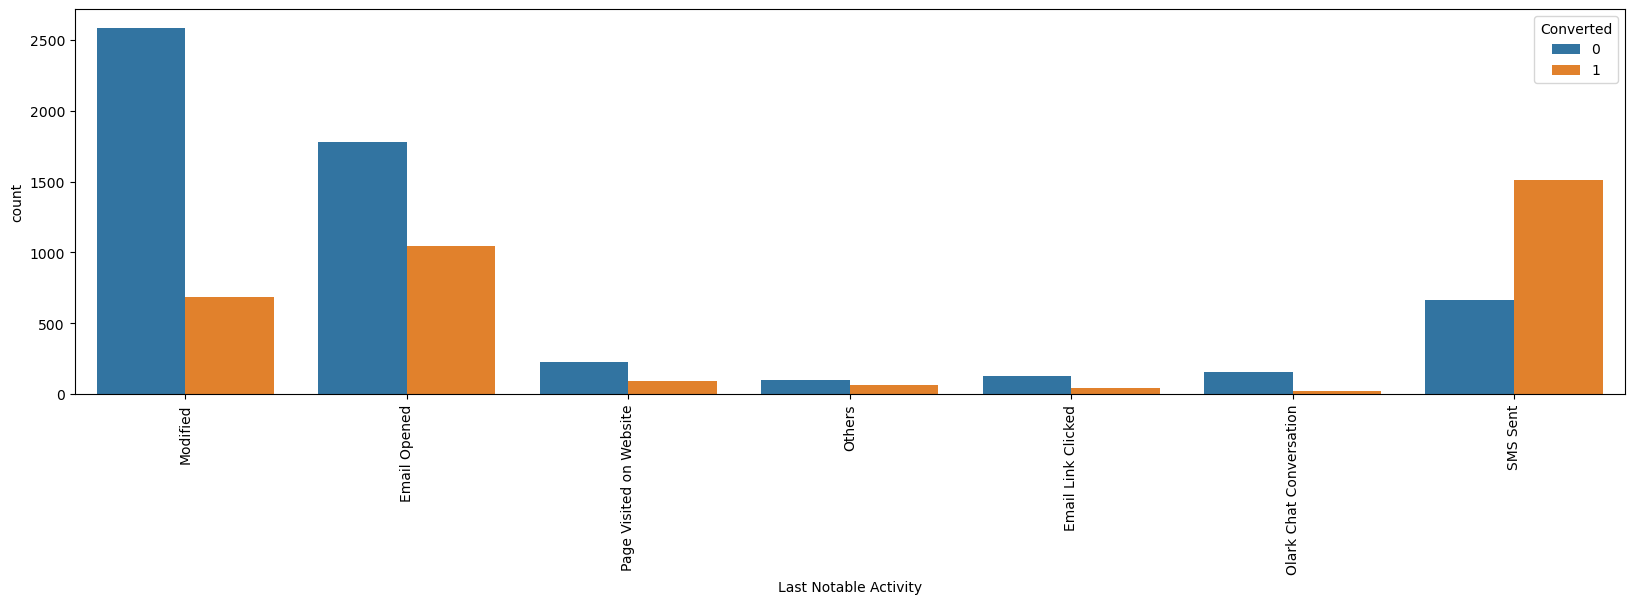

In [494]:
plt.figure(figsize=[20,5])
s_plot = sns.countplot(x=data['Last Notable Activity'], hue=data['Converted'])
s_plot.set_xticklabels(s_plot.get_xticklabels(),rotation=90)
plt.show()

In [495]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   object 
 

In [496]:
data.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.380204,3.445238,481.350104,2.362820
std,0.485464,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,1.000000
50%,0.000000,3.000000,244.000000,2.000000
75%,1.000000,5.000000,919.500000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


#### Outlier Treatment

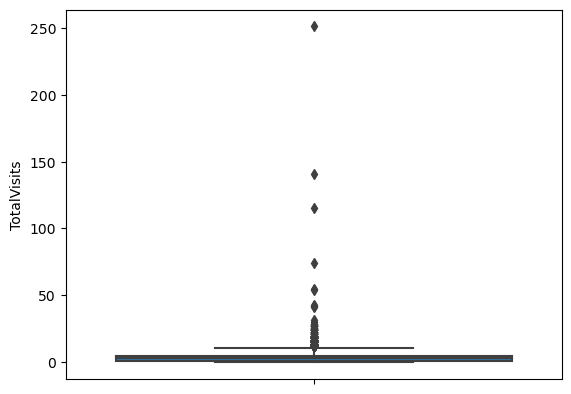

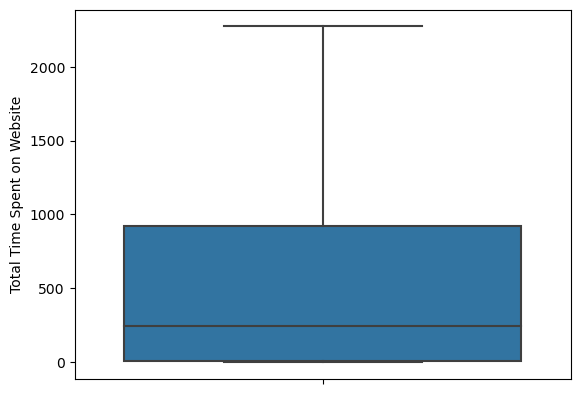

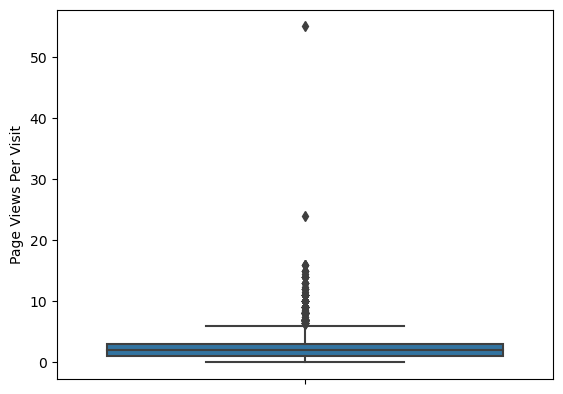

In [497]:
col_out = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

for i in col_out:
    sns.boxplot(y=data[i])
    plt.show()

In [498]:
# outlier treatment
q3 = data['TotalVisits'].quantile(0.99)
data = data[data['TotalVisits'] <= q3]

q1 = data['TotalVisits'].quantile(0.01)
data = data[data['TotalVisits'] >= q1]

q3 = data['Page Views Per Visit'].quantile(0.99)
data = data[data['Page Views Per Visit'] <= q3]

q1 = data['Page Views Per Visit'].quantile(0.01)
data = data[data['Page Views Per Visit'] >= q1]


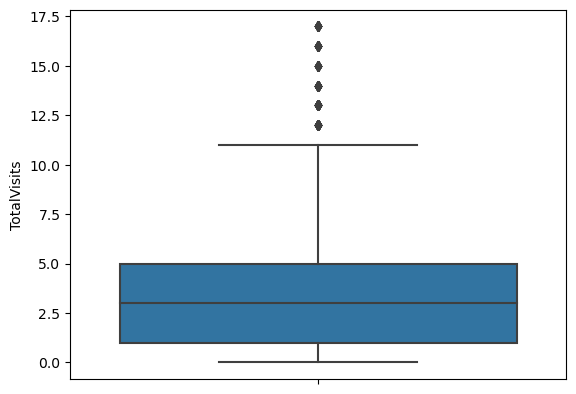

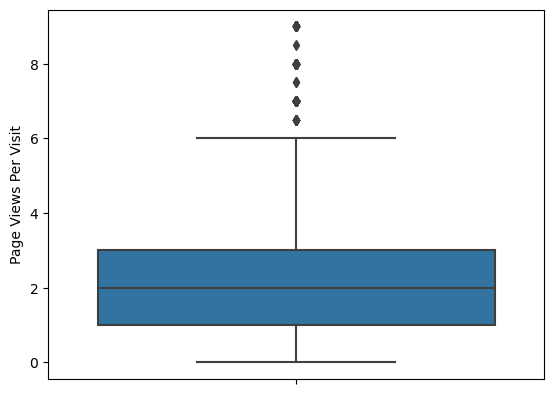

In [499]:
col_after_out = ['TotalVisits','Page Views Per Visit']

for i in col_after_out:
    sns.boxplot(y=data[i])
    plt.show()

In [500]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8953 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8953 non-null   object 
 1   Lead Source                             8953 non-null   object 
 2   Do Not Email                            8953 non-null   object 
 3   Converted                               8953 non-null   int64  
 4   TotalVisits                             8953 non-null   float64
 5   Total Time Spent on Website             8953 non-null   int64  
 6   Page Views Per Visit                    8953 non-null   float64
 7   Last Activity                           8953 non-null   object 
 8   Specialization                          8953 non-null   object 
 9   What is your current occupation         8953 non-null   object 
 10  Tags                                    8953 non-null   object 
 

In [501]:
data.shape

(8953, 14)

#### Converting binomial variables to numerical columns

In [502]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Other,Low in Relevance,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Others,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Others,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Others,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Others,No,Modified


In [503]:
var_cols = ['Do Not Email','A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes':1, 'No':0})


data[var_cols] = data[var_cols].apply(binary_map)

In [504]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Other,Low in Relevance,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Others,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Others,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Others,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Others,0,Modified


#### Creating dummy variables for categorical columns

In [505]:
dummy = pd.get_dummies(data['Lead Quality'],prefix='Lead Quality', drop_first=True,dtype='int')
data = pd.concat([data, dummy],axis=1)

In [506]:
dummy = pd.get_dummies(data['Lead Origin'],prefix='Lead Origin', drop_first=True,dtype='int')
data = pd.concat([data, dummy],axis=1)

In [507]:
dummy = pd.get_dummies(data['Lead Source'],prefix='Lead Source', drop_first=True,dtype='int')
data = pd.concat([data, dummy], axis=1)

In [508]:
dummy = pd.get_dummies(data['Last Activity'],prefix='Last Activity', drop_first=True,dtype='int')
data = pd.concat([data, dummy], axis=1)

In [509]:
dummy = pd.get_dummies(data['Specialization'],prefix='Specialization', drop_first=True,dtype='int')
data = pd.concat([data, dummy], axis=1)

In [510]:
dummy = pd.get_dummies(data['What is your current occupation'],prefix='What is your current occupation', drop_first=True,dtype='int')
data = pd.concat([data, dummy], axis=1)

In [511]:
dummy = pd.get_dummies(data['Tags'],prefix='Tags', drop_first=True,dtype='int')
data = pd.concat([data, dummy], axis=1)

In [512]:
dummy = pd.get_dummies(data['Last Notable Activity'],prefix='Last Notable Activity', drop_first=True,dtype='int')
data = pd.concat([data, dummy], axis=1)

In [513]:
data.shape

(8953, 60)

In [514]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8953 entries, 0 to 9239
Data columns (total 60 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin                                           8953 non-null   object 
 1   Lead Source                                           8953 non-null   object 
 2   Do Not Email                                          8953 non-null   int64  
 3   Converted                                             8953 non-null   int64  
 4   TotalVisits                                           8953 non-null   float64
 5   Total Time Spent on Website                           8953 non-null   int64  
 6   Page Views Per Visit                                  8953 non-null   float64
 7   Last Activity                                         8953 non-null   object 
 8   Specialization                                        8953 non-

In [515]:
col_to_drop =['Lead Quality','Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation',
              'Tags','Last Notable Activity']

In [516]:
data.drop(col_to_drop, axis=1, inplace=True)

In [517]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8953 entries, 0 to 9239
Data columns (total 52 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          8953 non-null   int64  
 1   Converted                                             8953 non-null   int64  
 2   TotalVisits                                           8953 non-null   float64
 3   Total Time Spent on Website                           8953 non-null   int64  
 4   Page Views Per Visit                                  8953 non-null   float64
 5   A free copy of Mastering The Interview                8953 non-null   int64  
 6   Lead Quality_Low in Relevance                         8953 non-null   int32  
 7   Lead Quality_Others                                   8953 non-null   int32  
 8   Lead Quality_Worst                                    8953 non-

In [518]:
col_corr = ['Do Not Email','Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit','A free copy of Mastering The Interview']

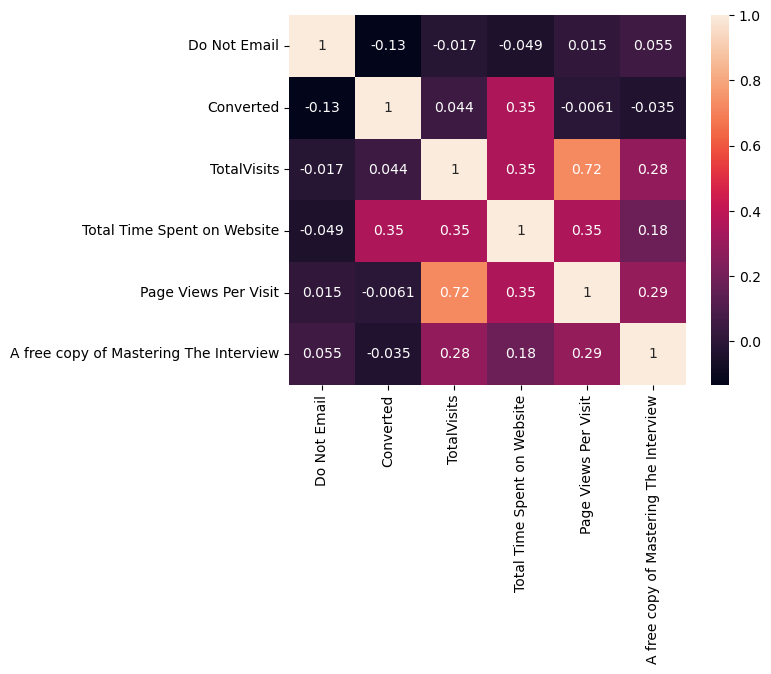

In [519]:
sns.heatmap(data[col_corr].corr(), annot=True)
plt.show()

### 4. Test-Train split

In [520]:
from sklearn.model_selection import train_test_split

In [521]:
# taking target column into Y set and rest in X set
X = data.drop('Converted', axis = 1)
y = data['Converted']

In [522]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, train_size=0.7)

In [523]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6267, 51)
(2686, 51)
(6267,)
(2686,)


In [524]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [525]:
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Quality_Low in Relevance,Lead Quality_Others,Lead Quality_Worst,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Tags_Not Specified,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3385,0,0.117647,0.127201,0.222222,1,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
2273,0,0.000000,0.000000,0.000000,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4234,0,0.235294,0.048856,0.444444,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
945,0,0.176471,0.182658,0.333333,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8689,0,0.000000,0.000000,0.000000,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0


In [526]:
#checking the conversion rate
round(sum(data['Converted'])/len(data.index), 2)*100

38.0

- Currently, conversion rate in 38%

### 5. Model Buidling

- Building model with statsmodel using RFE

In [527]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

logreg = LogisticRegression()

In [528]:
from sklearn.feature_selection import RFE
rfe= RFE(logreg, n_features_to_select=20)
rfe= rfe.fit(X_train, y_train)

C:\Users\Vyanky\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Vyanky\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [529]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 24),
 ('Lead Quality_Low in Relevance', False, 15),
 ('Lead Quality_Others', True, 1),
 ('Lead Quality_Worst', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 8),
 ('Lead Source_Google', False, 14),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Others', False, 27),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Social Media', False, 31),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Link Clicked', False, 18),
 ('Last Activity_Email Opened', False, 4),
 ('Last Activity_Form Submitted on Website', False, 6),
 ('Last Activity_Others', False, 9),
 ('Last Activity_Page Visited on Website', False, 30),
 ('Last Activity_SMS Sent', True, 1),
 ('S

In [530]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Quality_Others', 'Lead Quality_Worst',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Not Specified',
       'Tags_Other', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [531]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'A free copy of Mastering The Interview',
       'Lead Quality_Low in Relevance', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Social Media', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Others', 'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management', 'Specialization_Media and Advertising',
       'Specialization_Not Specified', 'Specialization_Operations Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Housewife',
       'What is your current occu

In [532]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logml1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logml1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6246
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1217.5
Date:                Mon, 17 Jun 2024   Deviance:                       2435.0
Time:                        18:28:20   Pearson chi2:                 8.80e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6112
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2925      0.377      0.775      0.438      -0.447       1.032
Do Not Email                                            -0.7870      0.244     -3.221      0.001      -1.266      -0.308
Total Time Spent on Website                              4.2088      0.240     17.521      0.000       3.738       4.680
Page Views Per Visit                                    -1.0120      0.337     -3.002      0.003      -1.673      -0.351
Lead Quality_Others                                     -1.0335      0.293     -3.525      0.000      -1.608      -0.459
Lead Quality_Worst                                      -2.5147      0.708     -3.552      0.000      -3.902      -1.127
Lead Origin_Landing Page Submission                     -0.8819      0.134     -6.560      0.000      -1.145      -0.618
Lead Origin_Lead Add Form                                2.4619      1.053      2.337      0.019       0.397       4.527
Lead Source_Reference                                   -1.8521      1.131     -1.638      0.101      -4.068       0.364
Lead Source_Welingak Website                             2.4973      1.464      1.706      0.088      -0.372       5.367
Last Activity_SMS Sent                                   1.4265      0.232      6.137      0.000       0.971       1.882
What is your current occupation_Working Professional     0.8490      0.389      2.181      0.029       0.086       1.612
Tags_Closed by Horizzon                                  5.7570      1.053      5.465      0.000       3.692       7.822
Tags_Lost to EINS                                        5.5656      0.787      7.070      0.000       4.023       7.109
Tags_Not Specified                                      -0.7941      0.227     -3.495      0.000      -1.239      -0.349
Tags_Other                                              -3.1066      0.292    -10.652      0.000      -3.678      -2.535
Tags_Ringing                                            -4.1675      0.313    -13.319      0.000      -4.781      -3.554
Tags_Will revert after reading the email                 3.1974      0.294     10.873      0.000       2.621       3.774
Last Notable Activity_Modified                          -1.4703      0.153     -9.581      0.000      -1.771      -1.169
Last Notable Activity_Olark Chat Conversation           -1.4541      0.408     -3.566      0.000      -2.253      -0.655
Last Notable Activity_SMS Sent                           0.7524      0.266      2.830      0.005       0.231       1.273
========================================================================================================================
"""

- p value of lead_source_refernce is hight, so we drop it

In [533]:
col = col.drop('Lead Source_Reference', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Quality_Others', 'Lead Quality_Worst',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Not Specified',
       'Tags_Other', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [534]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logml2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logml2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6247
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1218.9
Date:                Mon, 17 Jun 2024   Deviance:                       2437.9
Time:                        18:28:20   Pearson chi2:                 9.01e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6110
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2688      0.377      0.713      0.476      -0.471       1.008
Do Not Email                                            -0.7719      0.242     -3.185      0.001      -1.247      -0.297
Total Time Spent on Website                              4.2079      0.240     17.528      0.000       3.737       4.678
Page Views Per Visit                                    -1.0068      0.337     -2.990      0.003      -1.667      -0.347
Lead Quality_Others                                     -1.0146      0.293     -3.462      0.001      -1.589      -0.440
Lead Quality_Worst                                      -2.4949      0.709     -3.519      0.000      -3.885      -1.105
Lead Origin_Landing Page Submission                     -0.8784      0.134     -6.542      0.000      -1.142      -0.615
Lead Origin_Lead Add Form                                0.9108      0.406      2.246      0.025       0.116       1.706
Lead Source_Welingak Website                             4.0467      1.095      3.695      0.000       1.900       6.193
Last Activity_SMS Sent                                   1.4119      0.232      6.074      0.000       0.956       1.867
What is your current occupation_Working Professional     0.8294      0.389      2.132      0.033       0.067       1.592
Tags_Closed by Horizzon                                  5.6980      1.052      5.418      0.000       3.637       7.759
Tags_Lost to EINS                                        5.5596      0.787      7.064      0.000       4.017       7.102
Tags_Not Specified                                      -0.7888      0.227     -3.473      0.001      -1.234      -0.344
Tags_Other                                              -3.1094      0.292    -10.659      0.000      -3.681      -2.538
Tags_Ringing                                            -4.1828      0.313    -13.354      0.000      -4.797      -3.569
Tags_Will revert after reading the email                 3.1866      0.294     10.849      0.000       2.611       3.762
Last Notable Activity_Modified                          -1.4632      0.153     -9.551      0.000      -1.764      -1.163
Last Notable Activity_Olark Chat Conversation           -1.4552      0.408     -3.570      0.000      -2.254      -0.656
Last Notable Activity_SMS Sent                           0.7677      0.266      2.887      0.004       0.247       1.289
========================================================================================================================
"""

- p value of What is your current occupation_Working Professional is hight, so we drop it

In [535]:
col = col.drop('What is your current occupation_Working Professional', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Quality_Others', 'Lead Quality_Worst',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Not Specified',
       'Tags_Other', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [536]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logml3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logml3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6248
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1221.4
Date:                Mon, 17 Jun 2024   Deviance:                       2442.8
Time:                        18:28:20   Pearson chi2:                 9.40e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6107
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2960      0.379      0.780      0.435      -0.448       1.040
Do Not Email                                     -0.7723      0.242     -3.186      0.001      -1.247      -0.297
Total Time Spent on Website                       4.2111      0.240     17.542      0.000       3.741       4.682
Page Views Per Visit                             -1.0237      0.337     -3.039      0.002      -1.684      -0.364
Lead Quality_Others                              -1.0407      0.295     -3.523      0.000      -1.620      -0.462
Lead Quality_Worst                               -2.5320      0.714     -3.548      0.000      -3.931      -1.133
Lead Origin_Landing Page Submission              -0.8725      0.134     -6.503      0.000      -1.135      -0.610
Lead Origin_Lead Add Form                         0.9591      0.403      2.383      0.017       0.170       1.748
Lead Source_Welingak Website                      3.9950      1.094      3.652      0.000       1.851       6.139
Last Activity_SMS Sent                            1.4177      0.232      6.103      0.000       0.962       1.873
Tags_Closed by Horizzon                           5.7908      1.052      5.506      0.000       3.730       7.852
Tags_Lost to EINS                                 5.5945      0.786      7.120      0.000       4.055       7.135
Tags_Not Specified                               -0.7853      0.227     -3.457      0.001      -1.231      -0.340
Tags_Other                                       -3.0870      0.291    -10.594      0.000      -3.658      -2.516
Tags_Ringing                                     -4.1729      0.313    -13.337      0.000      -4.786      -3.560
Tags_Will revert after reading the email          3.3319      0.288     11.552      0.000       2.767       3.897
Last Notable Activity_Modified                   -1.4704      0.153     -9.592      0.000      -1.771      -1.170
Last Notable Activity_Olark Chat Conversation    -1.4624      0.408     -3.582      0.000      -2.263      -0.662
Last Notable Activity_SMS Sent                    0.7616      0.266      2.867      0.004       0.241       1.282
=================================================================================================================
"""

- p value of Lead Origin_Lead Add Form is hight, so we drop it

In [537]:
col = col.drop('Lead Origin_Lead Add Form', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Quality_Others', 'Lead Quality_Worst',
       'Lead Origin_Landing Page Submission', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Not Specified', 'Tags_Other', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [538]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logml4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logml4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6249
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1224.4
Date:                Mon, 17 Jun 2024   Deviance:                       2448.8
Time:                        18:28:21   Pearson chi2:                 8.98e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6104
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.4175      0.378      1.103      0.270      -0.324       1.159
Do Not Email                                     -0.7095      0.237     -2.997      0.003      -1.173      -0.246
Total Time Spent on Website                       4.1829      0.240     17.397      0.000       3.712       4.654
Page Views Per Visit                             -1.1295      0.336     -3.364      0.001      -1.788      -0.471
Lead Quality_Others                              -1.1049      0.297     -3.720      0.000      -1.687      -0.523
Lead Quality_Worst                               -2.6062      0.711     -3.664      0.000      -4.000      -1.212
Lead Origin_Landing Page Submission              -0.9037      0.134     -6.741      0.000      -1.166      -0.641
Lead Source_Welingak Website                      4.9061      1.025      4.786      0.000       2.897       6.915
Last Activity_SMS Sent                            1.4657      0.230      6.364      0.000       1.014       1.917
Tags_Closed by Horizzon                           6.0396      1.049      5.757      0.000       3.983       8.096
Tags_Lost to EINS                                 5.6386      0.786      7.177      0.000       4.099       7.178
Tags_Not Specified                               -0.7977      0.228     -3.504      0.000      -1.244      -0.352
Tags_Other                                       -3.0837      0.292    -10.575      0.000      -3.655      -2.512
Tags_Ringing                                     -4.1352      0.312    -13.249      0.000      -4.747      -3.523
Tags_Will revert after reading the email          3.4141      0.287     11.897      0.000       2.852       3.977
Last Notable Activity_Modified                   -1.4994      0.153     -9.786      0.000      -1.800      -1.199
Last Notable Activity_Olark Chat Conversation    -1.4889      0.408     -3.649      0.000      -2.289      -0.689
Last Notable Activity_SMS Sent                    0.7362      0.264      2.787      0.005       0.218       1.254
=================================================================================================================
"""

- p value of Last Notable Activity_SMS Sent is hight, so we drop it

In [539]:
col = col.drop('Last Notable Activity_SMS Sent', 1)

#BUILDING MODEL #5

X_train_sm = sm.add_constant(X_train[col])
logml5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logml5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6250
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1228.3
Date:                Mon, 17 Jun 2024   Deviance:                       2456.6
Time:                        18:28:21   Pearson chi2:                 9.28e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6099
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.4983      0.376      1.325      0.185      -0.239       1.236
Do Not Email                                     -0.6965      0.236     -2.945      0.003      -1.160      -0.233
Total Time Spent on Website                       4.1697      0.240     17.383      0.000       3.700       4.640
Page Views Per Visit                             -1.1574      0.333     -3.474      0.001      -1.810      -0.504
Lead Quality_Others                              -1.0969      0.297     -3.693      0.000      -1.679      -0.515
Lead Quality_Worst                               -2.6234      0.705     -3.723      0.000      -4.005      -1.242
Lead Origin_Landing Page Submission              -0.9109      0.133     -6.840      0.000      -1.172      -0.650
Lead Source_Welingak Website                      4.8956      1.028      4.763      0.000       2.881       6.910
Last Activity_SMS Sent                            2.0188      0.116     17.338      0.000       1.791       2.247
Tags_Closed by Horizzon                           6.1577      1.050      5.866      0.000       4.100       8.215
Tags_Lost to EINS                                 5.7625      0.789      7.302      0.000       4.216       7.309
Tags_Not Specified                               -0.8170      0.225     -3.628      0.000      -1.258      -0.376
Tags_Other                                       -3.0473      0.289    -10.541      0.000      -3.614      -2.481
Tags_Ringing                                     -4.0674      0.309    -13.184      0.000      -4.672      -3.463
Tags_Will revert after reading the email          3.4548      0.288     12.015      0.000       2.891       4.018
Last Notable Activity_Modified                   -1.7569      0.127    -13.815      0.000      -2.006      -1.508
Last Notable Activity_Olark Chat Conversation    -1.5559      0.408     -3.816      0.000      -2.355      -0.757
=================================================================================================================
"""

- p value of Do Not Email is hight, so we drop it

In [540]:
col = col.drop('Do Not Email', 1)

#BUILDING MODEL #6

X_train_sm = sm.add_constant(X_train[col])
logml6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logml6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1233.0
Date:                Mon, 17 Jun 2024   Deviance:                       2466.0
Time:                        18:28:21   Pearson chi2:                 9.45e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6093
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.5201      0.376      1.382      0.167      -0.218       1.258
Total Time Spent on Website                       4.1701      0.239     17.465      0.000       3.702       4.638
Page Views Per Visit                             -1.1321      0.331     -3.422      0.001      -1.781      -0.484
Lead Quality_Others                              -1.1166      0.298     -3.751      0.000      -1.700      -0.533
Lead Quality_Worst                               -2.6818      0.706     -3.796      0.000      -4.066      -1.297
Lead Origin_Landing Page Submission              -0.9340      0.133     -7.047      0.000      -1.194      -0.674
Lead Source_Welingak Website                      4.9086      1.029      4.770      0.000       2.892       6.926
Last Activity_SMS Sent                            2.0026      0.116     17.273      0.000       1.775       2.230
Tags_Closed by Horizzon                           6.1753      1.050      5.882      0.000       4.118       8.233
Tags_Lost to EINS                                 5.7832      0.792      7.305      0.000       4.232       7.335
Tags_Not Specified                               -0.8463      0.225     -3.763      0.000      -1.287      -0.406
Tags_Other                                       -3.1056      0.288    -10.773      0.000      -3.671      -2.541
Tags_Ringing                                     -4.0788      0.308    -13.238      0.000      -4.683      -3.475
Tags_Will revert after reading the email          3.4437      0.287     11.985      0.000       2.881       4.007
Last Notable Activity_Modified                   -1.7847      0.127    -14.085      0.000      -2.033      -1.536
Last Notable Activity_Olark Chat Conversation    -1.5751      0.410     -3.845      0.000      -2.378      -0.772
=================================================================================================================
"""

- p value of Page Views Per Visit is hight, so we drop it

In [541]:
col = col.drop('Page Views Per Visit', 1)

#BUILDING MODEL #7

X_train_sm = sm.add_constant(X_train[col])
logml7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logml7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1239.1
Date:                Mon, 17 Jun 2024   Deviance:                       2478.1
Time:                        18:28:21   Pearson chi2:                 9.71e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6085
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.3330      0.370      0.901      0.368      -0.392       1.057
Total Time Spent on Website                       3.9759      0.230     17.262      0.000       3.524       4.427
Lead Quality_Others                              -1.1048      0.296     -3.733      0.000      -1.685      -0.525
Lead Quality_Worst                               -2.6501      0.710     -3.735      0.000      -4.041      -1.259
Lead Origin_Landing Page Submission              -1.1413      0.118     -9.681      0.000      -1.372      -0.910
Lead Source_Welingak Website                      5.0254      1.028      4.888      0.000       3.011       7.040
Last Activity_SMS Sent                            1.9899      0.115     17.256      0.000       1.764       2.216
Tags_Closed by Horizzon                           6.2568      1.049      5.966      0.000       4.201       8.312
Tags_Lost to EINS                                 5.8690      0.788      7.452      0.000       4.325       7.413
Tags_Not Specified                               -0.7986      0.222     -3.599      0.000      -1.234      -0.364
Tags_Other                                       -3.0650      0.285    -10.738      0.000      -3.624      -2.506
Tags_Ringing                                     -4.0374      0.305    -13.221      0.000      -4.636      -3.439
Tags_Will revert after reading the email          3.4735      0.285     12.190      0.000       2.915       4.032
Last Notable Activity_Modified                   -1.7690      0.127    -13.983      0.000      -2.017      -1.521
Last Notable Activity_Olark Chat Conversation    -1.5267      0.408     -3.745      0.000      -2.326      -0.728
=================================================================================================================
"""

- Since `All` the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [542]:
X_train_new = X_train_sm.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.astype(float).values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                                         Features   VIF
1                             Lead Quality_Others  9.12
8                              Tags_Not Specified  5.21
9                                      Tags_Other  3.61
3             Lead Origin_Landing Page Submission  2.49
10                                   Tags_Ringing  2.46
11       Tags_Will revert after reading the email  2.36
0                     Total Time Spent on Website  2.14
2                              Lead Quality_Worst  2.05
12                 Last Notable Activity_Modified  1.83
5                          Last Activity_SMS Sent  1.72
7                               Tags_Lost to EINS  1.23
6                         Tags_Closed by Horizzon  1.14
13  Last Notable Activity_Olark Chat Conversation  1.08
4                    Lead Source_Welingak Website  1.07


- The VIF of Lead Quality_Others is very high, so we can proceed with dropping it and rebuild the model

In [543]:
col = col.drop('Lead Quality_Others', 1)

#BUILDING MODEL #8

X_train_sm = sm.add_constant(X_train[col])
logml8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logml8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1246.3
Date:                Mon, 17 Jun 2024   Deviance:                       2492.6
Time:                        18:28:21   Pearson chi2:                 8.99e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6076
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.7333      0.235     -3.127      0.002      -1.193      -0.274
Total Time Spent on Website                       3.9705      0.230     17.276      0.000       3.520       4.421
Lead Quality_Worst                               -1.6912      0.668     -2.530      0.011      -3.001      -0.381
Lead Origin_Landing Page Submission              -1.1525      0.118     -9.792      0.000      -1.383      -0.922
Lead Source_Welingak Website                      5.0148      1.028      4.878      0.000       3.000       7.030
Last Activity_SMS Sent                            1.9652      0.116     17.008      0.000       1.739       2.192
Tags_Closed by Horizzon                           7.0074      1.033      6.783      0.000       4.982       9.032
Tags_Lost to EINS                                 5.9468      0.789      7.536      0.000       4.400       7.493
Tags_Not Specified                               -0.8165      0.222     -3.684      0.000      -1.251      -0.382
Tags_Other                                       -2.9692      0.283    -10.510      0.000      -3.523      -2.415
Tags_Ringing                                     -4.0402      0.305    -13.235      0.000      -4.638      -3.442
Tags_Will revert after reading the email          3.8708      0.273     14.157      0.000       3.335       4.407
Last Notable Activity_Modified                   -1.7814      0.126    -14.094      0.000      -2.029      -1.534
Last Notable Activity_Olark Chat Conversation    -1.5530      0.411     -3.781      0.000      -2.358      -0.748
=================================================================================================================
"""

- The p value of Lead Quality_Worst is high, we must drop it

In [544]:
X_train_new = X_train_sm.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.astype(float).values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                                         Features   VIF
2             Lead Origin_Landing Page Submission  2.47
0                     Total Time Spent on Website  2.14
8                                      Tags_Other  2.13
7                              Tags_Not Specified  1.95
10       Tags_Will revert after reading the email  1.84
11                 Last Notable Activity_Modified  1.81
4                          Last Activity_SMS Sent  1.60
1                              Lead Quality_Worst  1.45
9                                    Tags_Ringing  1.40
5                         Tags_Closed by Horizzon  1.13
6                               Tags_Lost to EINS  1.12
3                    Lead Source_Welingak Website  1.07
12  Last Notable Activity_Olark Chat Conversation  1.07


In [545]:
col = col.drop('Lead Quality_Worst', 1)

#BUILDING MODEL #9

X_train_sm = sm.add_constant(X_train[col])
logml9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logml9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6254
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1250.7
Date:                Mon, 17 Jun 2024   Deviance:                       2501.4
Time:                        18:28:21   Pearson chi2:                 9.10e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6071
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.7414      0.235     -3.158      0.002      -1.202      -0.281
Total Time Spent on Website                       3.9606      0.229     17.274      0.000       3.511       4.410
Lead Origin_Landing Page Submission              -1.1562      0.118     -9.838      0.000      -1.387      -0.926
Lead Source_Welingak Website                      5.0139      1.028      4.876      0.000       2.999       7.029
Last Activity_SMS Sent                            1.9909      0.115     17.241      0.000       1.765       2.217
Tags_Closed by Horizzon                           7.0140      1.033      6.788      0.000       4.989       9.039
Tags_Lost to EINS                                 5.7405      0.760      7.549      0.000       4.250       7.231
Tags_Not Specified                               -0.8128      0.222     -3.661      0.000      -1.248      -0.378
Tags_Other                                       -3.1765      0.278    -11.414      0.000      -3.722      -2.631
Tags_Ringing                                     -4.0459      0.306    -13.241      0.000      -4.645      -3.447
Tags_Will revert after reading the email          3.8731      0.274     14.154      0.000       3.337       4.409
Last Notable Activity_Modified                   -1.7855      0.126    -14.126      0.000      -2.033      -1.538
Last Notable Activity_Olark Chat Conversation    -1.5443      0.410     -3.768      0.000      -2.348      -0.741
=================================================================================================================
"""

In [546]:
#checking VIF

X_train_new = X_train_sm.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.astype(float).values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                                         Features   VIF
1             Lead Origin_Landing Page Submission  2.47
0                     Total Time Spent on Website  2.14
6                              Tags_Not Specified  1.95
9        Tags_Will revert after reading the email  1.84
10                 Last Notable Activity_Modified  1.81
7                                      Tags_Other  1.69
3                          Last Activity_SMS Sent  1.60
8                                    Tags_Ringing  1.40
4                         Tags_Closed by Horizzon  1.13
5                               Tags_Lost to EINS  1.12
2                    Lead Source_Welingak Website  1.07
11  Last Notable Activity_Olark Chat Conversation  1.07


- The p value and VIF of the model number 9 are well under control and we can proceed for further evaluation with this model

### 6. Model Evaluation

In [547]:
# Getting the Predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred.head()

3385    0.018124
2273    0.998465
4234    0.371446
945     0.002873
8689    0.019496
dtype: float64

In [548]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.81244292e-02, 9.98465434e-01, 3.71446375e-01, 2.87329637e-03,
       1.94955826e-02, 3.42302125e-02, 2.90792393e-02, 5.06752704e-03,
       8.20347127e-04, 9.16118623e-03])

In [549]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.018124,3385
1,1,0.998465,2273
2,0,0.371446,4234
3,0,0.002873,945
4,0,0.019496,8689


In [550]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.018124,3385,0
1,1,0.998465,2273,1
2,0,0.371446,4234,0
3,0,0.002873,945,0
4,0,0.019496,8689,0


In [551]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3677  175]
 [ 280 2135]]


In [552]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9273974788575076


In [553]:
TP = confusion[1,1] # true positive 
FP = confusion[0,1] # false positives
TN = confusion[0,0] # true negatives
FN = confusion[1,0] # false negatives

In [554]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.8840579710144928

In [555]:
#  specificity of our logistic regression model
TN / float(TN+FP)

0.9545690550363447

In [556]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.04543094496365525


In [557]:
# positive predictive value 
print (TP / float(TP+FP))

0.9242424242424242


In [558]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9292393227192317


In [559]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [560]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Converted_prob, drop_intermediate = False )

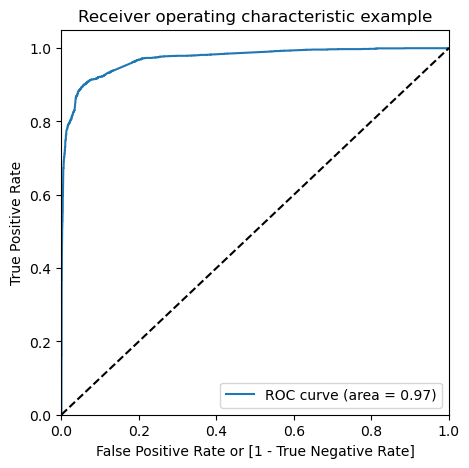

In [561]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

- The are of ROC curve should be as much as close to 1, and this model is showing 0.97 which indicates a good predcitive model
- These, above calculation was performed on arbitrary cut off value of 0.5, now we will calculate the best cut-off value and evaluate the model

In [562]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.018124,3385,0,1,0,0,0,0,0,0,0,0,0
1,1,0.998465,2273,1,1,1,1,1,1,1,1,1,1,1
2,0,0.371446,4234,0,1,1,1,1,0,0,0,0,0,0
3,0,0.002873,945,0,1,0,0,0,0,0,0,0,0,0
4,0,0.019496,8689,0,1,0,0,0,0,0,0,0,0,0


In [563]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs


cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385352  1.000000  0.000000
0.1   0.1  0.841870  0.974327  0.758827
0.2   0.2  0.898995  0.932505  0.877985
0.3   0.3  0.920057  0.913872  0.923936
0.4   0.4  0.925961  0.897308  0.943925
0.5   0.5  0.927397  0.884058  0.954569
0.6   0.6  0.924685  0.863768  0.962876
0.7   0.7  0.909207  0.804555  0.974818
0.8   0.8  0.903622  0.770186  0.987279
0.9   0.9  0.887506  0.722153  0.991173


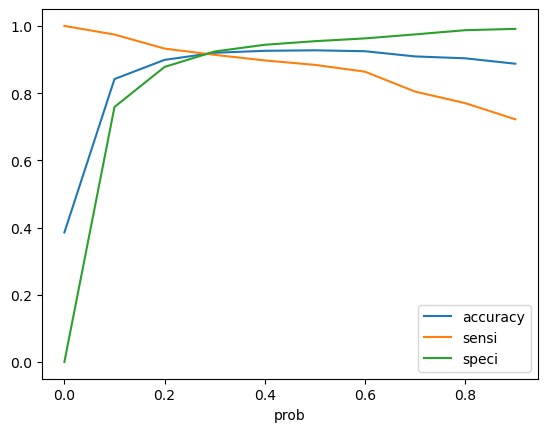

In [564]:
# Lets plot the above values in line chart so to find best cut off value
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [565]:
# from the above curve, we can see that the best cut-off value is 0.3

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.018124,3385,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.998465,2273,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.371446,4234,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.002873,945,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.019496,8689,0,1,0,0,0,0,0,0,0,0,0,0


In [566]:
# giving the lead score for probability for conversion rate best on cut off value
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.018124,3385,0,2
1,1,0.998465,2273,1,100
2,0,0.371446,4234,1,37
3,0,0.002873,945,0,0
4,0,0.019496,8689,0,2


In [567]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9200574437529918

In [568]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3559,  293],
       [ 208, 2207]], dtype=int64)

In [569]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [570]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.913871635610766

In [571]:
# Let us calculate specificity
TN / float(TN+FP)

0.9239356178608515

- Key Observation:
1. The accuaracy of train data is 92%
2. Specificity is 92.39%
3. Sensitivity is 91.38%
4. The ROC curve value is 0.97

In [572]:
#False Postive Rate - predicting conversion when customer does not have to convert
print(FP/ float(TN+FP))

0.0760643821391485


In [573]:
# Positive predictive value - identification of actual positives from total positives
print (TP / float(TP+FP))

0.8828


In [574]:
# Negative predictive value - identification of actual negatives from total negatives
print (TN / float(TN+ FN))

0.9447836474648261


In [575]:
# Precision
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.8828

In [576]:
# recall
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.913871635610766

In [577]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8828

In [578]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.913871635610766

In [579]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

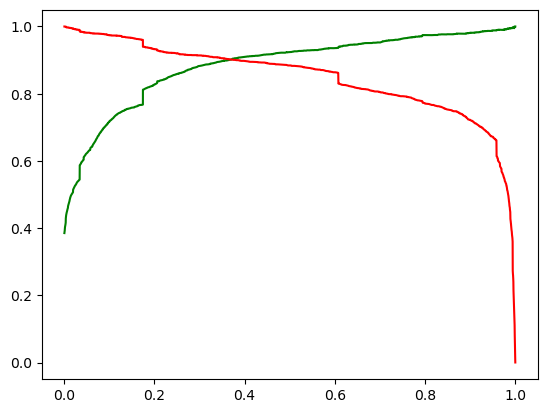

In [580]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [581]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Quality_Low in Relevance,Lead Quality_Others,Lead Quality_Worst,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Tags_Not Specified,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
5098,0.0,0.000000,0.000000,0.000000,0.0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4535,0.0,0.117647,0.318182,0.222222,0.0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3190,0.0,0.235294,0.765550,0.444444,0.0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
7457,0.0,0.294118,0.092344,0.555556,0.0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
6974,0.0,0.000000,0.000000,0.000000,0.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


- Integrating the final columns of final model into test set

In [582]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Not Specified,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
5098,0.000000,0,0,0,0,0,1,0,0,0,0,1
4535,0.318182,1,0,1,0,0,1,0,0,0,0,0
3190,0.765550,0,0,1,0,0,1,0,0,0,0,0
7457,0.092344,0,0,0,0,0,0,1,0,0,1,0
6974,0.000000,0,0,1,0,0,0,0,0,1,0,0


In [583]:
X_test_sm = sm.add_constant(X_test)

#### Predications of test set

In [584]:
y_test_pred = res.predict(X_test_sm)
y_test_pred.head()

5098    0.043165
4535    0.631971
3190    0.969784
7457    0.004784
6974    0.994075
dtype: float64

In [585]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
5098,0.043165
4535,0.631971
3190,0.969784
7457,0.004784
6974,0.994075


In [586]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)
y_test_df['Prospect ID'] = y_test_df.index

In [587]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [588]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,5098,0.043165
1,1,4535,0.631971
2,1,3190,0.969784
3,0,7457,0.004784
4,1,6974,0.994075


In [589]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,5098,0,0.043165,4
1,4535,1,0.631971,63
2,3190,1,0.969784,97
3,7457,0,0.004784,0
4,6974,1,0.994075,99


In [590]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,5098,0,0.043165,4,0
1,4535,1,0.631971,63,1
2,3190,1,0.969784,97,1
3,7457,0,0.004784,0,0
4,6974,1,0.994075,99,1


- Evaluating test set

In [591]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.921072226358898

In [592]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion3

array([[1562,  144],
       [  68,  912]], dtype=int64)

In [593]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negative

In [594]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9306122448979591

In [595]:
# Let us calculate specificity
TN / float(TN+FP)

0.9155920281359906

In [596]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8636363636363636

In [597]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9306122448979591

- Final observation:
- Train: 
- Accuracy is 92% 
- Specificity is 92.39%
- Sensitivity is 91.38%

- Test:
- Accuaracy is 92.10%
- Specificity is 91.55%
- Sensitivity is 93.06%